# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.ticker as mticker

In [2]:
#Data from the "Equal  Remuneration: The Gender  Pay  Gap" from WGEA website.

avg_total_remunerations_GPS_data={"Years":[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                      "Avg_salary_base": [28.6, 27.4, 26.3, 25.4, 24.5,24.2, 23.3, 22.8, 22.8,21.7]}
avg_total_remunerations_GPS=pd.DataFrame(avg_total_remunerations_GPS_data)
avg_total_remunerations_GPS= avg_total_remunerations_GPS.set_index("Years")

# ARIMA: AVG Total Remuneration GPG

In [3]:
train_avg_remun =avg_total_remunerations_GPS.iloc[:-2]

In [4]:
#Select the optimum (p,d,q) values.

p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))

min_aic = np.inf
best_param = None

for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(train_avg_remun, order=param)
        model_arima_fit = model_arima.fit()
        aic = model_arima_fit.aic
        if aic < min_aic:
            min_aic = aic
            best_param = param
        print(param, aic)
    except:
        continue

print("Best param:", best_param)
print("Minimum AIC:", min_aic)

Best param: None
Minimum AIC: inf


In [5]:
ARIMAmodel = ARIMA(train_avg_remun, order = (4,2,2))
ARIMAmodel_fit = ARIMAmodel.fit()

# Predict when the Gender remuneration Gap will be close to zero.

n_periods = 26
forecast = ARIMAmodel_fit.forecast(steps=n_periods)
predictions=list(forecast)
pred_remun=pd.DataFrame()
pred_remun["Years"]=range(2021,2047)
pred_remun["predictions"]=predictions
pred_remun= pred_remun.set_index("Years")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

In [6]:
pred_remun.tail()

,predictions
Years,
2042,4.038768
2043,2.921349
2044,1.761833
2045,1.173506
2046,0.315696


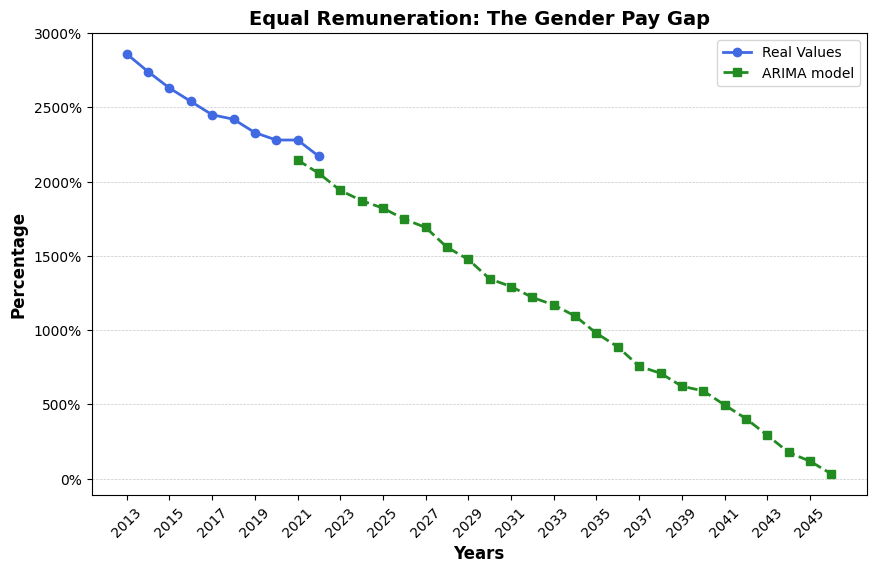

In [11]:
# Adjust figure size as needed
plt.figure(figsize=(10, 6))  

# Plotting real values
plt.plot(avg_total_remunerations_GPS.index, avg_total_remunerations_GPS, label='Real Values', color='royalblue', marker='o', linestyle='-', linewidth=2)

# Plotting ARIMA model predictions
plt.plot(pred_remun.index, pred_remun, label='ARIMA model', color='forestgreen', marker='s', linestyle='--', linewidth=2)

# Customize x-axis ticks and labels from 2013 to 2026
plt.xticks(np.arange(2013, 2047, step=2), rotation=45, fontsize=10)


# Adding legend in the upper left corner
plt.legend(loc="upper right", fontsize=10)

# Labeling axes
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel("Percentage", fontsize=12, fontweight='bold')

# Formatting y-axis as percentage
formatter = mticker.PercentFormatter(xmax=1.0, decimals=0)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Title
plt.title('Equal Remuneration: The Gender Pay Gap', fontsize=14, fontweight='bold')

plt.show()